<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/WK2_House_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Data**

<a href="https://colab.research.google.com/github/Karlajack/MachineLearning1/blob/main/Wk2-housepoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
## import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno
##import from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings(action="ignore")





In [2]:
# importing the data

train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**EDA and Data Preparation**

**Exploring Missigness**

In [ ]:
train.shape

(1460, 81)

In [5]:
Total_missing=train.isnull().sum().sort_values(ascending=False)
Total_missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Text(0.5, 1.0, 'missingness values')

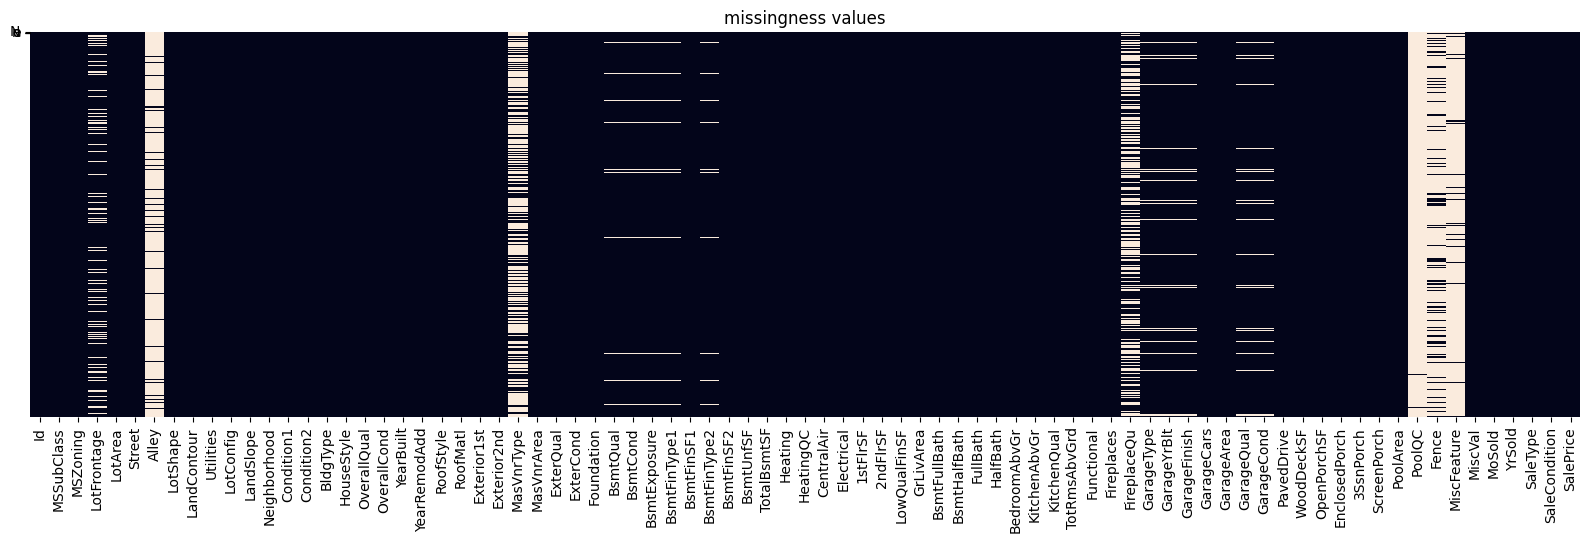

In [6]:
plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [7]:
Total=train.isnull().count().sort_values(ascending=False)
Total

Id             1460
CentralAir     1460
GarageYrBlt    1460
GarageType     1460
FireplaceQu    1460
               ... 
MasVnrArea     1460
MasVnrType     1460
Exterior2nd    1460
Exterior1st    1460
SalePrice      1460
Length: 81, dtype: int64

In [8]:
percent=Total_missing/Total*100
percent

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley           93.767123
BedroomAbvGr     0.000000
                  ...    
Utilities        0.000000
WoodDeckSF       0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
YrSold           0.000000
Length: 81, dtype: float64

In [9]:



missing=pd.concat([Total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)

missing.index.name='variable'

missing=missing[missing['total_missing']>0]
missing.head(2)




,total_missing,percentage_missing
variable,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370


<Figure size 2000x2000 with 0 Axes>

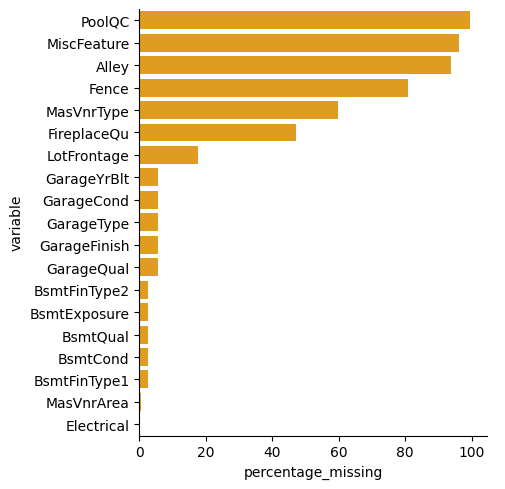

In [10]:
## plot now
plt.figure(figsize=(20,20))
ax=sns.catplot(y='variable',x='percentage_missing',data=missing,kind='bar',color='orange')

In [11]:
train.columns[train.isnull().sum().sort_values(ascending=False)>0]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond'],
      dtype='object')

In [13]:
# change the column names to lower case
train.columns=map(str.lower,train.columns)
# data.columns = [x.lower() for x in data.columns] #would also suffice
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Explore all the categorical variables

In [ ]:
## Data preparation
#Missingess
#imputing categorical values with mode
categorical_cols=train.select_dtypes(include=['object']).columns
train[categorical_cols]=train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0])
train[categorical_cols].head()
#imputing numerical values with Median
numerical_cols=train.select_dtypes(include=['float64','int64']).columns
train[numerical_cols]=train[numerical_cols].fillna(train[numerical_cols].median())
train[numerical_cols].head()
train[numerical_cols].columns






Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [ ]:
train.isnull().sum().sort_values(ascending=False)

id             0
centralair     0
garageyrblt    0
garagetype     0
fireplacequ    0
              ..
masvnrarea     0
masvnrtype     0
exterior2nd    0
exterior1st    0
saleprice      0
Length: 81, dtype: int64

In [ ]:
train.info()

# Exploring Outliers

In [ ]:

cols_to_plot=train['saleprice']
cols_to_plot

fig,axes=plt.subplots(ncols=len(cols_to_plot))
for i,j in zip(cols_to_plot,axes):
  sns.boxplot(data=train(i),ax=j,color='Maroon')
  j.set_title(i)

  plt.tight_layout()
  plt.show()


In [ ]:
train[categorical_cols].head(2)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


# **Label encoding**

In [ ]:
le=LabelEncoder()
cat_encoded=train[categorical_cols].apply(le.fit_transform)
cat_encoded.head(2)



,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4


In [ ]:
train_df=pd.concat([train[numerical_cols],cat_encoded],axis=1)
train_df.shape

(1460, 81)

In [ ]:
train_df.head(2)


,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,1,4,4,2,2,2,2,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1,4,4,2,2,2,2,8,4


**# #Data Separation into the X and Y matrices**

In [ ]:
x=train_df.drop('saleprice',axis=1)
y=train_df['saleprice']

**Scaling**

In [ ]:
scaler=StandardScaler() #MinMaxScaler
scaler.fit_transform(x)

array([[-1.73086488,  0.07337496, -0.22087509, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276,  0.46031974, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.08463612, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.08463612, ...,  0.03948531,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276,  0.23325479, ...,  0.03948531,
         0.31386709,  0.2085023 ]])

In [ ]:
pd.DataFrame(scaler.fit_transform(x),columns=x.columns).head(3)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.049718,0.250362,0.039485,0.313867,0.208502


## **Separate training ans test sets**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1022, 80) (438, 80) (1022,) (438,)


# **Fitting Regression models**

# **Simple Linear Regression**

In [ ]:
model_reg=LinearRegression()
model_reg.fit(x_train,y_train)
y_hat=model_reg.predict(x_test)
r2_score(y_test,y_hat)



0.863279482518591

# **Randomforestregressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_reg1=RandomForestRegressor()
model_reg1.fit(x_train,y_train)
y_hat=model_reg1.predict(x_test)
r2_score(y_test,y_hat)


0.8750156542303634

# **Ridge Regression**

In [ ]:

model_reg2=Ridge()
model_reg2.fit(x_train,y_train)
y_hat=model_reg2.predict(x_test)
r2_score(y_test,y_hat)

0.8634984295450692

# **Lasso Regression**

In [ ]:

model_reg2=Lasso()
model_reg2.fit(x_train,y_train)
y_hat=model_reg2.predict(x_test)
r2_score(y_test,y_hat)

0.8633008305333502